# Final task - version 1.1 - 24.I.2025
The Database Database is a publicly available and free drug information database
(medicinal substances). Was created in 2006 by the band Craig Knox i
David Wishart from the Faculty of Information Technology and Biological Sciences of the University of Alberty in
Canada. Combines data in the field of chemistry, biochemistry, genetics, pharmacology and
pharmacokinetics.

Because access to the full database requires the creation of an account, completing the form
With the justification of the request for access and obtaining acceptance, for the purposes of this
the completion project will be made available to you, the Lidbank_Partial.xml file with
Daled version of the base. This file contains data for 100 drugs (full base published
2024-03-14 has information about over 16,000 drugs).

# Task 1
Create a data frame that contains the following information for each drug: unique
The drug identifier in the Database Base, the name of the drug, its type, description, character in which a given drug
there is, indications, mechanism of action and information with what foods a given drug
interacts.

In [20]:
import pandas as pd
import xml.etree.ElementTree as ET

# Name space settings (NameSpace) for Dzwbank XML
ns = {'db': 'http://www.drugbank.ca'}

# Xml files parsing
# Tree = et.Parse ('Dwarbank_partial.xml')
tree = ET.parse('drugbank_partial.xml')
root = tree.getroot()

records = []
for drug in root.findall('db:drug', ns):
    records.append({
        'drug_id': drug.find('db:drugbank-id[@primary="true"]', ns).text,
        'name': drug.find('db:name', ns).text,
        'type': drug.attrib.get('type'),
        'description': drug.find('db:description', ns).text,
        'state': drug.find('db:state', ns).text,
        'indication': drug.find('db:indication', ns).text,
        'mechanism_of_action': drug.find('db:mechanism-of-action', ns).text,
        'food_interactions': [food_interaction.text for food_interaction in drug.findall('db:food-interactions/db:food-interaction', ns)],
    })

# Data frame creation
df = pd.DataFrame(records)
display(df)

,drug_id,name,type,description,state,indication,mechanism_of_action,food_interactions
0,DB00001,Lepirudin,biotech,Lepirudin is a recombinant hirudin formed by 6...,solid,Lepirudin is indicated for anticoagulation in ...,Lepirudin is a direct thrombin inhibitor used ...,[Avoid herbs and supplements with anticoagulan...
1,DB00002,Cetuximab,biotech,Cetuximab is a recombinant chimeric human/mous...,liquid,Cetuximab indicated for the treatment of local...,The epidermal growth factor receptor (EGFR) is...,[]
2,DB00003,Dornase alfa,biotech,Dornase alfa is a biosynthetic form of human d...,liquid,Used as adjunct therapy in the treatment of cy...,Dornase alfa is a biosynthetic form of human D...,[]
3,DB00004,Denileukin diftitox,biotech,A recombinant DNA-derived cytotoxic protein co...,liquid,For treatment of cutaneous T-cell lymphoma,Denileukin diftitox binds to the high-affinity...,[]
4,DB00005,Etanercept,biotech,Dimeric fusion protein consisting of the extra...,liquid,Etanercept is indicated for the treatment of m...,There are two distinct receptors for TNF (TNFR...,[]
...,...,...,...,...,...,...,...,...
95,DB00104,Octreotide,biotech,Acromegaly is a disorder caused by excess grow...,solid,Octreotide by injection is used for the treatm...,Octreotide binds to somatostatin receptors cou...,[Take on an empty stomach. The oral capsules s...
96,DB00105,Interferon alfa-2b,biotech,Interferon alpha 2b (human leukocyte clone hif...,liquid,"For the treatment of hairy cell leukemia, mali...",Interferon alpha binds to type I interferon re...,[Avoid alcohol.]
97,DB00106,Abarelix,small molecule,Synthetic decapeptide antagonist to gonadotrop...,solid,For palliative treatment of advanced prostate ...,Abarelix binds to the gonadotropin releasing h...,[]
98,DB00107,Oxytocin,biotech,Sir Henry H. Dale first identified oxytocin an...,liquid,Administration of exogenous oxytocin is indica...,Oxytocin plays a vital role in labour and deli...,[]


# Task 2

Create a data frame that allows you to search for a Twiska ID information about all synonyms under which the drug is present. Write a function that will create and draw synonyms with the NetworkX library for the given Twiszd ID. The readability of the generated drawing should be taken care of.

In [ ]:
# Creating a data frame with synonyms
synonym_records = []
drug_synonyms_dict = {}

for drug in root.findall('db:drug', ns):    
    # Download all synonyms (Elements <Synonym> inside <Synonyms>)
    synonyms = [syn.text for syn in drug.findall('db:synonyms/db:synonym', ns)]
    
    drug_synonyms_dict[drug.find('db:drugbank-id[@primary="true"]', ns).text] = synonyms
    synonym_records.append({
        'drug_id': drug.find('db:drugbank-id[@primary="true"]', ns).text,
        'synonyms': synonyms
    })

df_synonyms = pd.DataFrame(synonym_records)
display(df_synonyms)

,drug_id,synonyms
0,DB00001,"[[Leu1, Thr2]-63-desulfohirudin, Desulfatohiru..."
1,DB00002,"[Cetuximab, Cétuximab, Cetuximabum]"
2,DB00003,[Deoxyribonuclease (human clone 18-1 protein m...
3,DB00004,"[Denileukin, Denileukin diftitox, Interleukin-..."
4,DB00005,"[Etanercept, etanercept-szzs, etanercept-ykro,..."
...,...,...
95,DB00104,"[Octreotida, Octreotide, Octreotidum, Octrotide]"
96,DB00105,"[Interferon alfa-2b, Interferon alfa-2b (recom..."
97,DB00106,[Abarelix]
98,DB00107,"[Oxitocina, Oxytocin]"


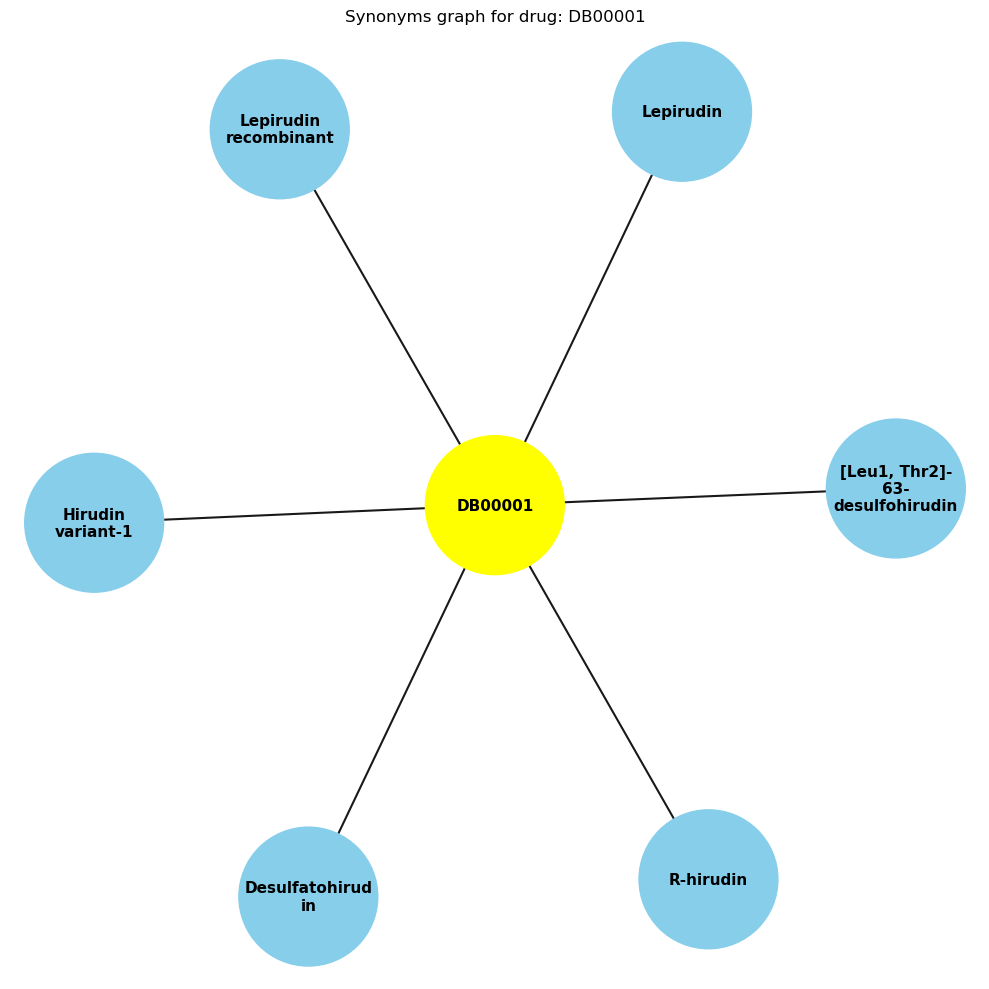

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import textwrap


# Function for drawing a synonym graph for the drug with the administered Drugbank ID
def plot_synonyms(drug_id):
    if drug_id not in drug_synonyms_dict:
        print("There is no drug with the given DrugBank ID.")
        return
        
    synonyms = drug_synonyms_dict[drug_id]
    if not synonyms:
        print("There are no synonyms for the given drug.")
        return

    G = nx.Graph()
    G.add_node(drug_id)  # Add drug node

    # We add vertices and edges for synonyms
    for syn in synonyms:
        G.add_node(syn)
        G.add_edge(drug_id, syn)

    # Coloring of the tops
    node_colors = ['yellow' if node == drug_id else 'skyblue' for node in G.nodes()]
    # Wrapping labels
    wrapped_labels = {node: textwrap.fill(node, width=14) for node in G.nodes()}

    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(G, seed=42)  # Layout of the graph

    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=10000)
    nx.draw_networkx_edges(G, pos, width=1.5, alpha=0.9)
    nx.draw_networkx_labels(G, pos, labels=wrapped_labels,font_size=11, font_weight='bold')

    plt.title(f'Synonyms graph for drug: {drug_id}')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Examples of a function for the drug for ID 'DB00001'
plot_synonyms('DB00001')

# Task 3

Create a data frame on pharmaceutical products containing a given drug (medicinal substance). The frame should contain information about the drug ID, product name, manufacturer, code in the National US registry (), the character in which the product appears, application method, information about the dose, country and the product recording agency.

In [23]:
records = []
for drug in root.findall('db:drug', ns):
    for product in drug.findall('db:products/db:product', ns):    
        records.append({
            'drug_id': drug.find('db:drugbank-id[@primary="true"]', ns).text,
            'product_name': product.find('db:name', ns).text,
            'labeller': product.find('db:labeller', ns).text,
            'national_drug_code': product.find('db:ndc-product-code', ns).text,
            'dosage_form': product.find('db:dosage-form', ns).text,
            'route': product.find('db:route', ns).text,
            'strength': product.find('db:strength', ns).text,
            'country': product.find('db:country', ns).text,
            'source': product.find('db:source', ns).text
        })

# Data frame creation
df_products = pd.DataFrame(records)
display(df_products)

,drug_id,product_name,labeller,national_drug_code,dosage_form,route,strength,country,source
0,DB00001,Refludan,Bayer,50419-150,Powder,Intravenous,50 mg/1mL,US,FDA NDC
1,DB00001,Refludan,Bayer,None,"Powder, for solution",Intravenous,50 mg / vial,Canada,DPD
2,DB00001,Refludan,Celgene Europe Limited,None,"Injection, solution, concentrate",Intravenous,50 mg,EU,EMA
3,DB00001,Refludan,Celgene Europe Limited,None,"Injection, solution, concentrate",Intravenous,50 mg,EU,EMA
4,DB00001,Refludan,Celgene Europe Limited,None,"Injection, solution, concentrate",Intravenous,20 mg,EU,EMA
...,...,...,...,...,...,...,...,...,...
4579,DB00108,Tysabri,Elan Pharmaceuticals,59075-730,Injection,Intravenous,300 mg/15mL,US,FDA NDC
4580,DB00108,Tysabri,Biogen Inc.,64406-008,Injection,Intravenous,300 mg/15mL,US,FDA NDC
4581,DB00108,Tysabri,Biogen,None,Solution,Intravenous,300 mg / 15 mL,Canada,DPD
4582,DB00108,Tysabri,Biogen Netherlands B.V.,None,"Injection, solution, concentrate",Intravenous,300 mg,EU,EMA


# Task 4

Create a data frame containing information about all trails of all types, i.e. signal, metabolic, etc. with which any drug interacts. Provide the total number of these routes.

In [24]:
pathways = []
for drug in root.findall('db:drug', ns):
    for pathway in drug.findall('db:pathways/db:pathway', ns):
        pathways.append({
            'smpdb_id': pathway.find('db:smpdb-id', ns).text,
            'name': pathway.find('db:name', ns).text,
            'category': pathway.find('db:category', ns).text,
            'drugs': [drug.find('db:drugbank-id', ns).text for drug in pathway.findall('db:drugs/db:drug', ns)],
            'enzymes': [enzyme.text for enzyme in pathway.findall('db:enzymes/db:uniprot-id', ns)]
        })

df_pathways = pd.DataFrame(pathways)
display(df_pathways)

,smpdb_id,name,category,drugs,enzymes
0,SMP0000278,Lepirudin Action Pathway,drug_action,"[DB00001, DB01022, DB01373]","[P00734, P00748, P02452, P03952, P03951, P0074..."
1,SMP0000474,Cetuximab Action Pathway,drug_action,[DB00002],[P00533]
2,SMP0000277,Bivalirudin Action Pathway,drug_action,"[DB00006, DB01022, DB01373]","[P00734, P00748, P02452, P03952, P03951, P0074..."
3,SMP0000280,Alteplase Action Pathway,drug_action,"[DB00009, DB01022, DB01373]","[P00747, P00748, P02452, P03952, P03951, P0074..."
4,SMP0000284,Urokinase Action Pathway,drug_action,"[DB00013, DB01022, DB01373]","[P00747, P00748, P02452, P03952, P03951, P0074..."
5,SMP0000285,Reteplase Action Pathway,drug_action,"[DB00015, DB01022, DB01373]","[P00747, P00748, P02452, P03952, P03951, P0074..."
6,SMP0000281,Anistreplase Action Pathway,drug_action,"[DB00029, DB01022, DB01373]","[P00747, P00748, P02452, P03952, P03951, P0074..."
7,SMP0000283,Tenecteplase Action Pathway,drug_action,"[DB00031, DB01022, DB01373]","[P00747, P00748, P02452, P03952, P03951, P0074..."
8,SMP0000265,Abciximab Action Pathway,drug_action,[DB00054],"[P08514, P05106]"
9,SMP0000266,Eptifibatide Action Pathway,drug_action,[DB00063],"[P08514, P05106]"


In [25]:
print(f'Total number of pathways: {len(pathways)}')

Total number of pathways: 12


# Task 5

For each signal/metabolic trail in the database, give medicines that interact with it. The results should be presented in the form of a data frame as well as in the graphic form it developed. An example of such graphics can be a graph
The twenty, where two types of vertices are signal trails and medicines, and the individual edges represent the interaction of a given drug with a given signal trail. You should take care of the readability and attractiveness of the graphic presentation.

In [26]:
# We use the frame from the previous task
drugs_and_pathways = df_pathways[['name','drugs']]
display(drugs_and_pathways)

,name,drugs
0,Lepirudin Action Pathway,"[DB00001, DB01022, DB01373]"
1,Cetuximab Action Pathway,[DB00002]
2,Bivalirudin Action Pathway,"[DB00006, DB01022, DB01373]"
3,Alteplase Action Pathway,"[DB00009, DB01022, DB01373]"
4,Urokinase Action Pathway,"[DB00013, DB01022, DB01373]"
5,Reteplase Action Pathway,"[DB00015, DB01022, DB01373]"
6,Anistreplase Action Pathway,"[DB00029, DB01022, DB01373]"
7,Tenecteplase Action Pathway,"[DB00031, DB01022, DB01373]"
8,Abciximab Action Pathway,[DB00054]
9,Eptifibatide Action Pathway,[DB00063]


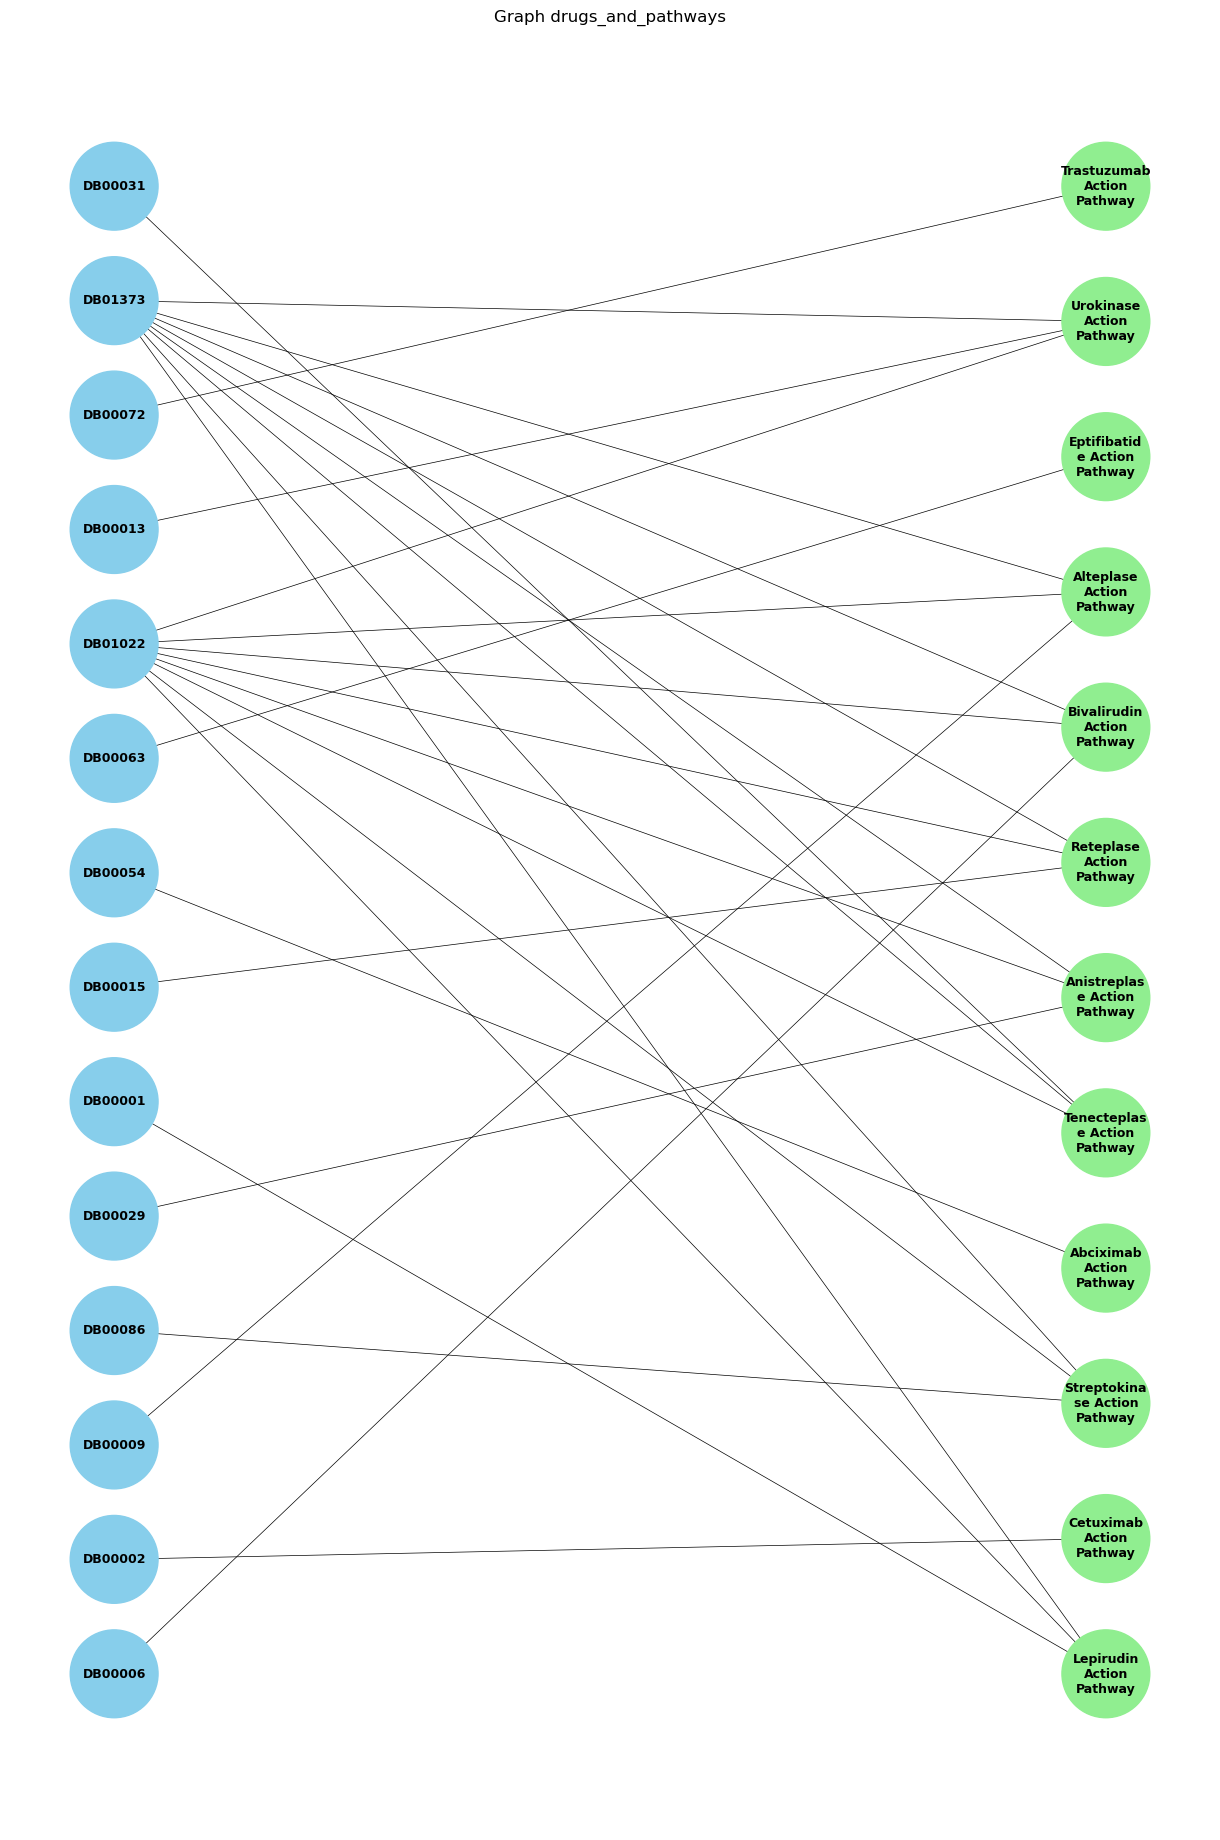

In [ ]:
# We create an empty graph
drugs_and_pathways_graph = nx.Graph()
drug_nodes = []
pathway_nodes = []

for row in drugs_and_pathways.itertuples():
    pathway_name = row.name
    drugs = row.drugs
    # Add the tip to the trail
    drugs_and_pathways_graph.add_node(pathway_name, bipartite='pathway')
    pathway_nodes.append(pathway_name)
    #Ey the list of drugs assigned to the trail
    for drug in drugs:
        # Add the tip for the drug (if it has not been added)
        if drug not in drugs_and_pathways_graph:
            drugs_and_pathways_graph.add_node(drug, bipartite='drug')
            drug_nodes.append(drug)
        # We connect the medicine with the trail
        drugs_and_pathways_graph.add_edge(drug, pathway_name)

# Determining the distribution of vertices - we divide both parts on the x axis
pos = nx.bipartite_layout(drugs_and_pathways_graph, drug_nodes)
plt.figure(figsize=(12, 18))

# Draw a graph with labels; We color the tops depending on belonging to the party
node_colors = ['skyblue' if drugs_and_pathways_graph.nodes[n]['bipartite'] == 'drug' else 'lightgreen' for n in drugs_and_pathways_graph.nodes()]
wrapeed_labels = {node: textwrap.fill(node, width=11) for node in drugs_and_pathways_graph.nodes()}
nx.draw(drugs_and_pathways_graph, pos, with_labels=True, labels=wrapeed_labels, node_color=node_colors, node_size=4000, font_size=9, font_weight='bold', width=0.5)
plt.title("Graph drugs_and_pathways")
plt.axis('off')
plt.show()

# Task 6

For each medicine in the database, give the number of routes with which a given drug interacts. Present the results in the form of a histogram with properly described axles.

,drug_id,pathways_count
0,DB00001,1
1,DB00002,1
2,DB00003,0
3,DB00004,0
4,DB00005,0
...,...,...
95,DB00104,0
96,DB00105,0
97,DB00106,0
98,DB00107,0


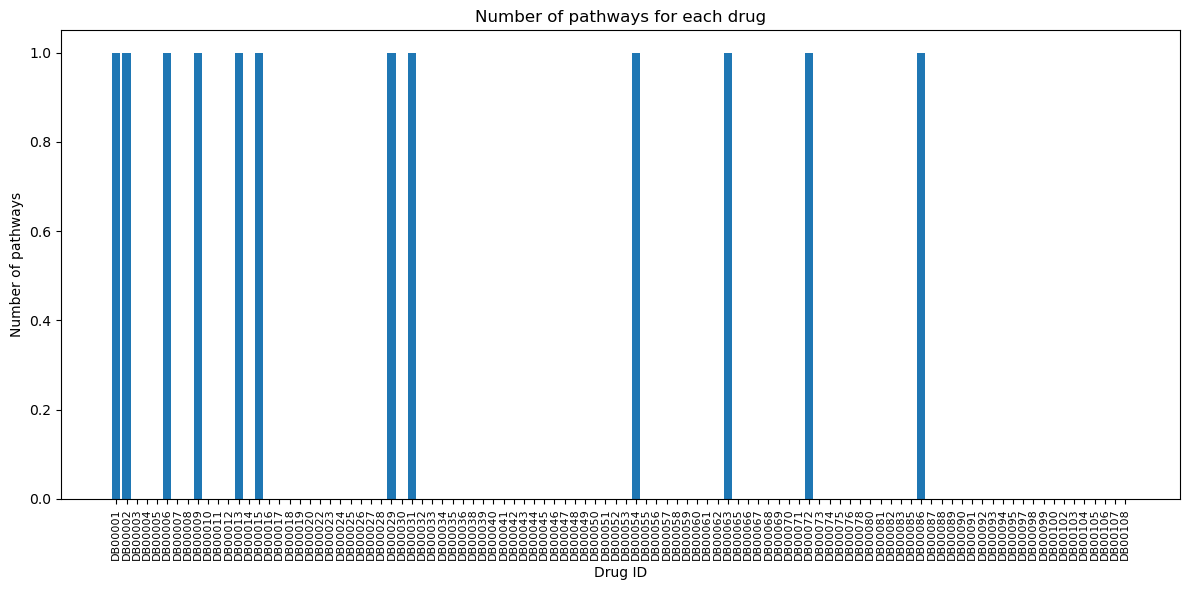

In [28]:
paths_counter = []
for drug in root.findall('db:drug', ns):
    count = 0
    for pathway in drug.findall('db:pathways/db:pathway', ns):
        count += 1
    paths_counter.append({
        'drug_id': drug.find('db:drugbank-id[@primary="true"]', ns).text,
        'pathways_count': count
    })
df_paths_counter = pd.DataFrame(paths_counter)
display(df_paths_counter)

# Histogram 1
plt.figure(figsize=(12, 6))
plt.bar(df_paths_counter['drug_id'], df_paths_counter['pathways_count'])
plt.xlabel('Drug ID')
plt.ylabel('Number of pathways')
plt.title('Number of pathways for each drug')
plt.xticks(rotation=90, size=8)
plt.tight_layout()
plt.show()

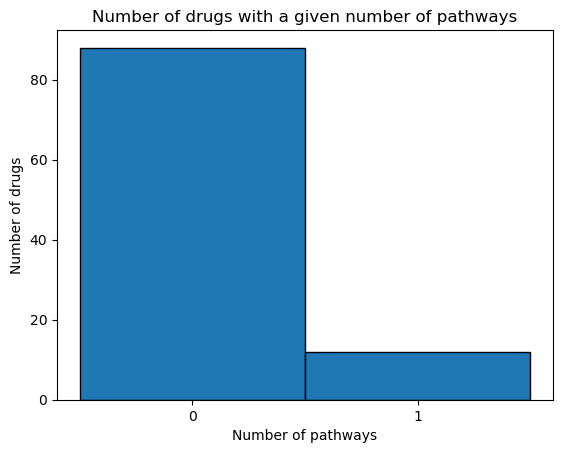

In [29]:
# Histogram 2
# We calculate the maximum number of trails for bine range setting
max_count = df_paths_counter['pathways_count'].max()

# We draw a histogram with bins defined from 0 to max_count + 1
counts, bins, patches = plt.hist(
    df_paths_counter['pathways_count'],
    bins=range(0, max_count + 2),
    edgecolor='black'
)

# We calculate bins so that the labels are in the middle of the posts
bin_centers = 0.5 * (bins[:-1] + bins[1:])
plt.xticks(bin_centers, range(0, max_count + 1))

plt.title("Number of drugs with a given number of pathways")
plt.xlabel("Number of pathways")
plt.ylabel("Number of drugs")
plt.show()

# Task 7

Create a data frame containing information about proteins with which individual drugs
They interact. These proteins are so -called Target. The data frame should contain
at least Dwidbank ID target, information about an external database (Source *,
e.g. Swiss-Prot
coding polypeptide, Genatlas ID gene identifier, chromosome number, location
in the cell

In [ ]:
targets = []
for drug in root.findall('db:drug', ns):
    for target in drug.findall('db:targets/db:target', ns):
        polypeptide = target.find('db:polypeptide', ns)
        genatlas_id = None
        # We check if there is a Genatlas ID
        if polypeptide is not None:
            for external_id in polypeptide.findall('db:external-identifiers/db:external-identifier', ns):
                if external_id.find('db:resource', ns).text == 'GenAtlas':
                    genatlas_id = external_id.find('db:identifier', ns).text
                    break
                    
        target={
                'target_id': target.find('db:id', ns).text,
                'source': polypeptide.attrib.get('source') if polypeptide is not None else None,
                'source_id': polypeptide.attrib.get('id') if polypeptide is not None else None,
                'polypeptide_name': polypeptide.find('db:name', ns).text if polypeptide is not None else None,
                'gene_name': polypeptide.find('db:gene-name', ns).text if polypeptide is not None else None,
                'genatlas_id': genatlas_id,
                'chromosome_location': polypeptide.find('db:chromosome-location', ns).text if polypeptide is not None else None,
                'cellular_location': polypeptide.find('db:cellular-location', ns).text if polypeptide is not None else None,
        }
        targets.append(target)
        
df_targets = pd.DataFrame(targets)
display(df_targets)

,target_id,source,source_id,polypeptide_name,gene_name,genatlas_id,chromosome_location,cellular_location
0,BE0000048,Swiss-Prot,P00734,Prothrombin,F2,F2,11,Secreted
1,BE0000767,Swiss-Prot,P00533,Epidermal growth factor receptor,EGFR,EGFR,7,Cell membrane
2,BE0000901,Swiss-Prot,O75015,Low affinity immunoglobulin gamma Fc region re...,FCGR3B,FCGR3B,1,Cell membrane
3,BE0002094,Swiss-Prot,P02745,Complement C1q subcomponent subunit A,C1QA,C1QA,1,Secreted
4,BE0002095,Swiss-Prot,P02746,Complement C1q subcomponent subunit B,C1QB,C1QB,1,Secreted
...,...,...,...,...,...,...,...,...
262,BE0000844,Swiss-Prot,P30559,Oxytocin receptor,OXTR,OXTR,3,Cell membrane
263,BE0000590,Swiss-Prot,P13612,Integrin alpha-4,ITGA4,ITGA4,2,Membrane
264,BE0000901,Swiss-Prot,O75015,Low affinity immunoglobulin gamma Fc region re...,FCGR3B,FCGR3B,1,Cell membrane
265,BE0000710,Swiss-Prot,P12314,High affinity immunoglobulin gamma Fc receptor I,FCGR1A,FCGR1A,1,Cell membrane


# Task 8

Create a circular chart presenting the percentage of target in various parts of the cell.

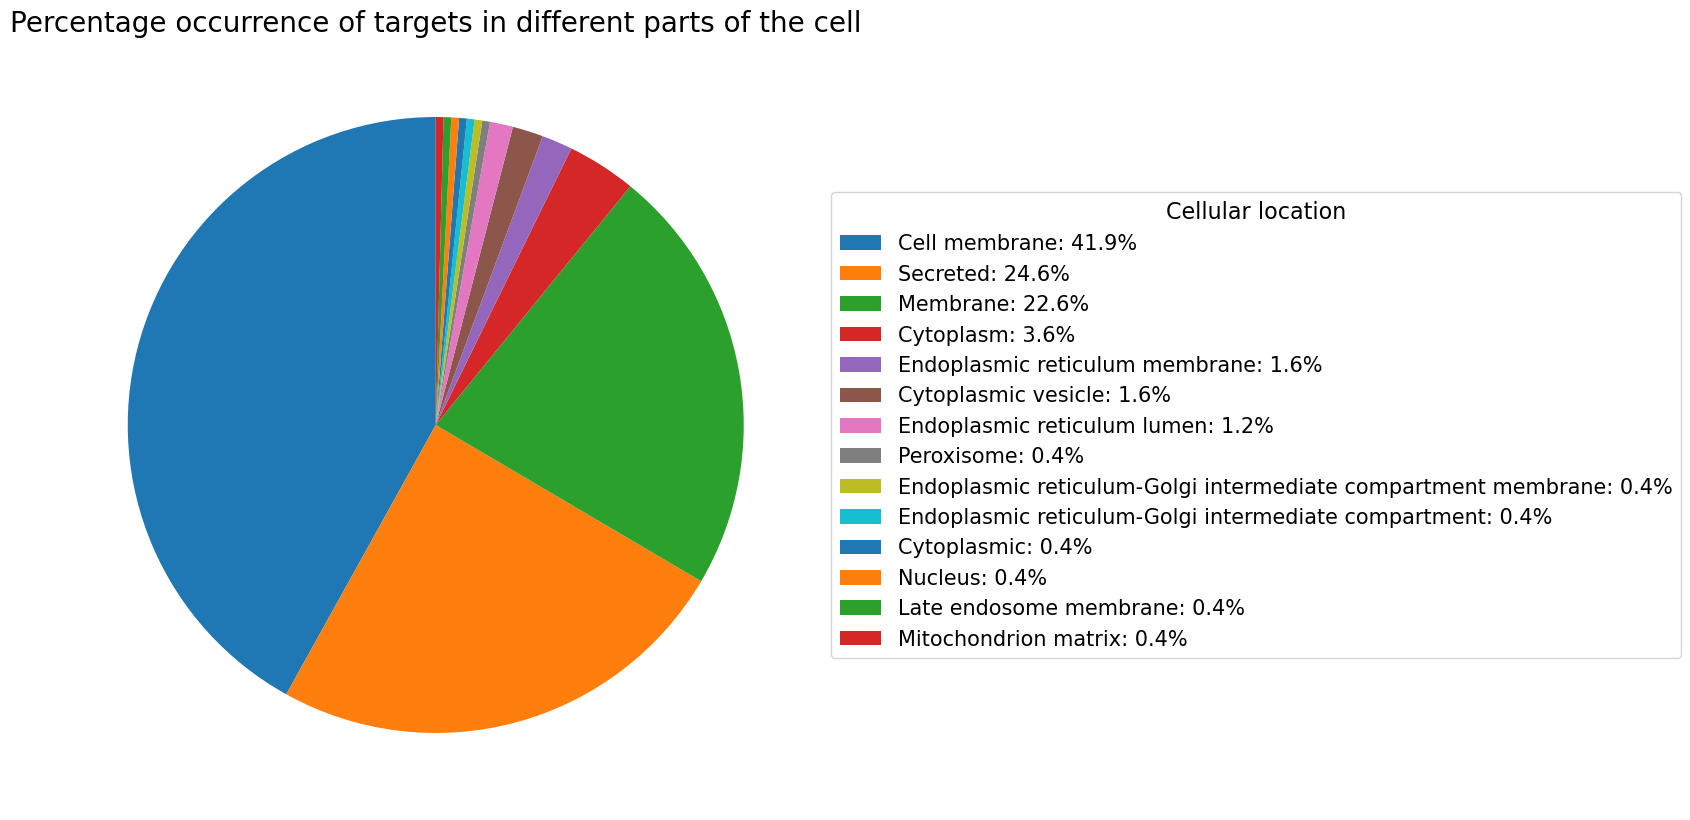

In [31]:

# We count the speeches of individual locations
counts = df_targets['cellular_location'].value_counts()

# We calculate the percentage share
total = counts.sum()
percentages = counts.apply(lambda x: 100 * x / total)

# We draw a circular chart without labels on the chart
fig, ax = plt.subplots(figsize=(10, 10))
wedges, texts = ax.pie(
    counts,
    autopct=None,
    startangle=90,
)

# We prepare labels for legend - name: percentage%
legend_labels = [f"{loc}: {perc:.1f}%" for loc, perc in percentages.items()]

# We add a legend next to the chart
legend = ax.legend(
    wedges, 
    legend_labels, 
    title="Cellular location", 
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1), 
    prop={'size': 15}
)
legend.get_title().set_fontsize(16)

plt.title("Percentage occurrence of targets in different parts of the cell", fontsize=20)
plt.show()

# Task 9

Create a data frame, showing how many medications have been approved, withdrawn, how many
is in the experimental phase
treating animals. Present this data on the circular chart. Provide the number of approved
drugs that have not been withdrawn.

,group,count
0,approved,98
1,withdrawn,10
2,experimental,57
3,vet_approved,4


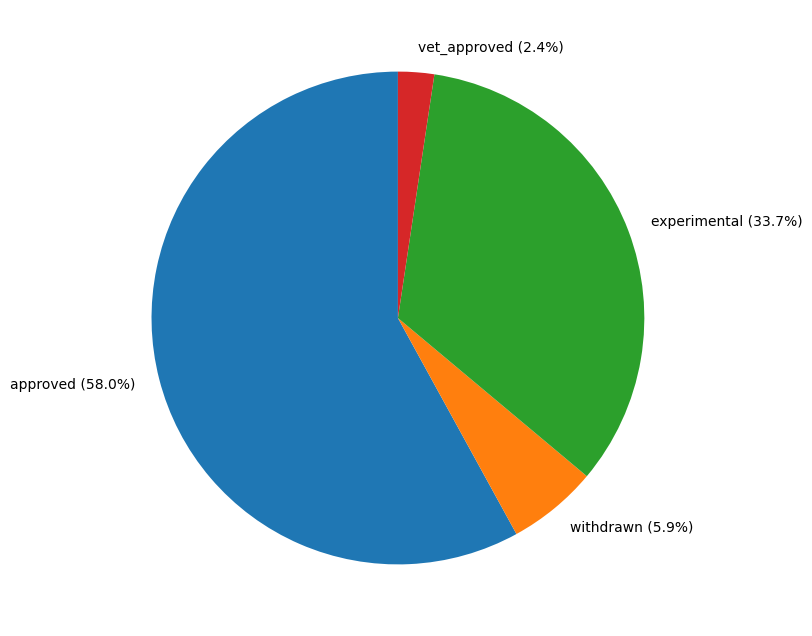

Number of drugs approved but not withdrawn: 89


In [32]:
counts = {
    'approved': 0,
    'withdrawn': 0,
    'experimental': 0,
    'vet_approved': 0
}
approved_but_withdrawn = 0
for drug in root.findall('db:drug', ns):
    i = 0
    for group in drug.findall('db:groups/db:group', ns):
        if group.text == 'investigational':
            counts['experimental'] += 1
        else:
            counts[group.text] += 1
        if group.text == 'withdrawn' or group.text == 'approved': 
            i+=1
    if i > 1:
        approved_but_withdrawn+=1

df_counts = pd.DataFrame(counts.items(), columns=['group', 'count'])
display(df_counts)


# We calculate the sum of values ​​to be able to calculate the percentages
total = df_counts['count'].sum()

# We create labels containing the name of the group and percentage share
labels = [f"{row['group']} ({row['count']/total*100:.1f}%)" for _, row in df_counts.iterrows()]

plt.figure(figsize=(8, 8))
plt.pie(df_counts['count'], labels=labels, startangle=90)
plt.show()

approved_not_withdrawn = counts['approved'] - approved_but_withdrawn
print(f'Number of drugs approved but not withdrawn: {approved_not_withdrawn}')


# Task 10

Create a data frame containing information on potential interactions
a given medicine with other drugs.

In [33]:
def zad10():
    interactions = []
    for drug in root.findall('db:drug', ns):
        drug_interactions = []
        for interaction in drug.findall('db:drug-interactions/db:drug-interaction', ns):
            drug_interactions.append({
                'drug_id': interaction.find('db:drugbank-id', ns).text,
                'description': interaction.find('db:description', ns).text
            })
        interactions.append({
            'drug_id': drug.find('db:drugbank-id[@primary="true"]', ns).text,
            'interaction_with(drug_id, description)': drug_interactions if drug_interactions else None
        })

    df_interactions = pd.DataFrame(interactions)
    display(df_interactions)

zad10()

,drug_id,"interaction_with(drug_id, description)"
0,DB00001,"[{'drug_id': 'DB06605', 'description': 'Apixab..."
1,DB00002,"[{'drug_id': 'DB00255', 'description': 'Diethy..."
2,DB00003,None
3,DB00004,"[{'drug_id': 'DB00012', 'description': 'The ri..."
4,DB00005,"[{'drug_id': 'DB08879', 'description': 'The ri..."
...,...,...
95,DB00104,"[{'drug_id': 'DB09063', 'description': 'Octreo..."
96,DB00105,"[{'drug_id': 'DB06643', 'description': 'The ri..."
97,DB00106,None
98,DB00107,"[{'drug_id': 'DB00429', 'description': 'Carbop..."


# Task 11

Develop a graphic presentation according to your own idea containing information about
specific gene or genes, medicinal substances that with this gene/genes
interact and pharmaceutical products that contain a given substance
healing. Selection regarding whether a graphic presentation is implemented for
We leave your decision at the same time a specific gene or all genes.
When making a choice, you should be guided by the readability and attractiveness of the presentation
graphic.

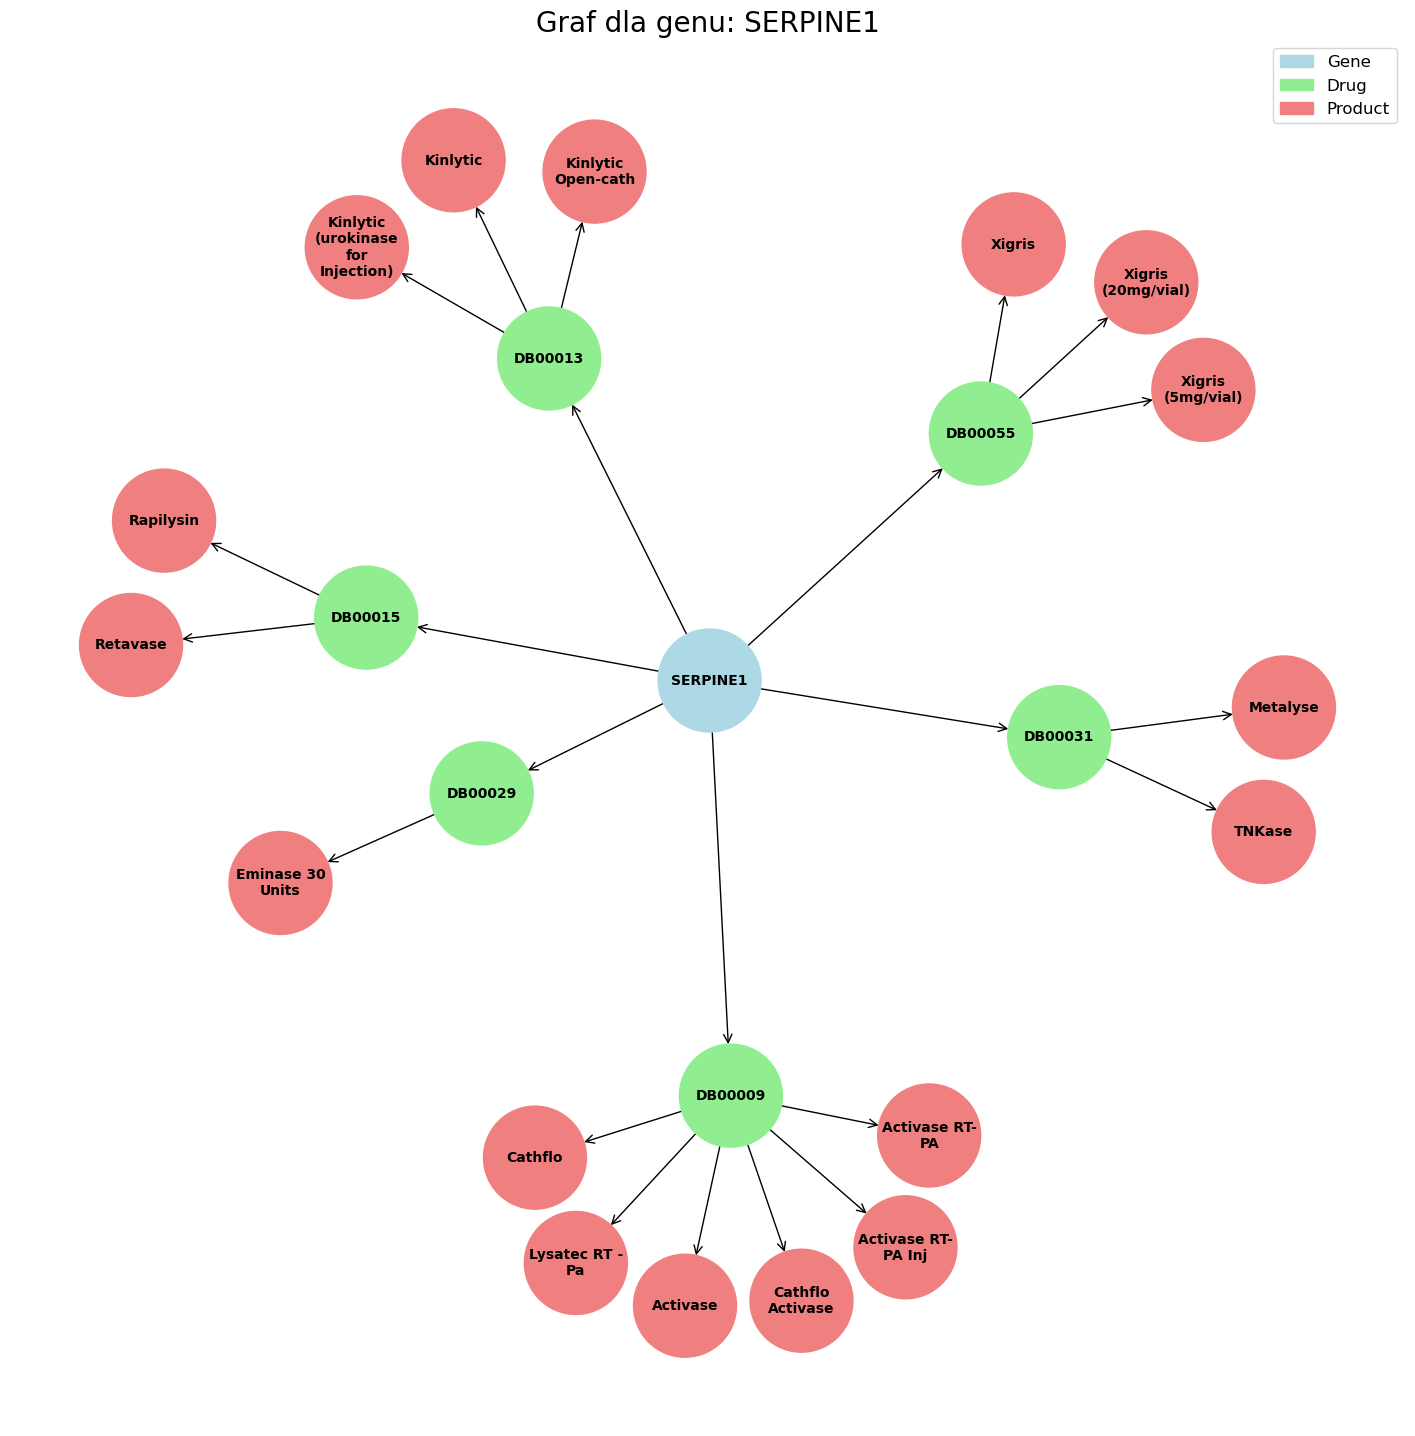

In [34]:
import matplotlib.patches as mpatches

def plot_gene_drug_product_graph(gene_name):
    gene_drugs = {}
    drug_products = {}

    for drug in root.findall('db:drug', ns):
        drug_id_elem = drug.find('db:drugbank-id[@primary="true"]', ns)
        if drug_id_elem is None:
            continue
        drug_id = drug_id_elem.text
        # Find all the name of the gene name in a given drug
        gene_elements = drug.findall('db:targets/db:target/db:polypeptide/db:gene-name', ns)
        for gene_elem in gene_elements:
            gene_text = gene_elem.text
            if gene_text not in gene_drugs:
                gene_drugs[gene_text] = []
            gene_drugs[gene_text].append(drug_id)
        
        # Find all pharmaceutical products for a given drug
        products = [prod.text for prod in drug.findall('db:products/db:product/db:name', ns)]
        drug_products[drug_id] = products

    
    gene_drug_product_graph = nx.Graph()
    
    gene_drug_product_graph.add_node(gene_name, color='lightblue') # Dodaj gen do grafu

    # Check if the gene is in the data
    if gene_name in gene_drugs:
        drugs = gene_drugs[gene_name]
        for drug in drugs:
            gene_drug_product_graph.add_node(drug, color='lightgreen')
            gene_drug_product_graph.add_edge(gene_name, drug)
            products = drug_products.get(drug, [])
            for product in products:
                gene_drug_product_graph.add_node(product, color='lightcoral')
                gene_drug_product_graph.add_edge(drug, product)
    else:
        print(f"Gen {gene_name} nie występuje w danych.")

    # Setting the position of the nodes and the appearance of the graph
    pos = nx.spring_layout(gene_drug_product_graph)
    node_colors = [gene_drug_product_graph.nodes[node].get('color', 'white') for node in gene_drug_product_graph.nodes()]
    wrapeed_labels = {node: textwrap.fill(node, width=12) for node in gene_drug_product_graph.nodes()}
    plt.figure(figsize=(18, 18))
    nx.draw_networkx(gene_drug_product_graph, pos, with_labels=True, labels=wrapeed_labels,
                    node_color=node_colors, node_size=5500,
                    font_size=10, font_weight='bold',
                    arrows=True, arrowstyle='->', arrowsize=15)
    
    # Add legend
    gene_patch = mpatches.Patch(color='lightblue', label='Gene')
    drug_patch = mpatches.Patch(color='lightgreen', label='Drug')
    product_patch = mpatches.Patch(color='lightcoral', label='Product')
    plt.legend(handles=[gene_patch, drug_patch, product_patch], loc='upper right', fontsize=12)

    plt.title(f"Graf dla genu: {gene_name}", fontsize=20)
    plt.axis('off')
    plt.show()

plot_gene_drug_product_graph('SERPINE1')


# Task 12
Propose your own analysis and presentation of drug data. You can in this
the purpose of obtaining additional information from other biomedical and bioinformatic bases
data available online. However, make sure that a given database allows for
Automated data download by the program. For example, the Genecards database
It prohibits it, which has been red emphasized on this page. Examples of bases
Data: Uniprot (https://www.uniprot.org/), Small Molecule Pathway Database
(https://smpdb.ca/), The Human Protein Atlas (https://www.poteinatlas.org/).

,superclass,state,count,drugs
0,Organic Acids,liquid,79,"[DB00002, DB00003, DB00004, DB00005, DB00008, ..."
1,Organic Acids,solid,11,"[DB00001, DB00025, DB00043, DB00048, DB00062, ..."
2,None,solid,4,"[DB00007, DB00035, DB00067, DB00080]"
3,Organic acids and derivatives,solid,3,"[DB00014, DB00091, DB00106]"
4,Organic Polymers,solid,2,"[DB00006, DB00050]"
5,Organic Polymers,liquid,1,[DB00027]


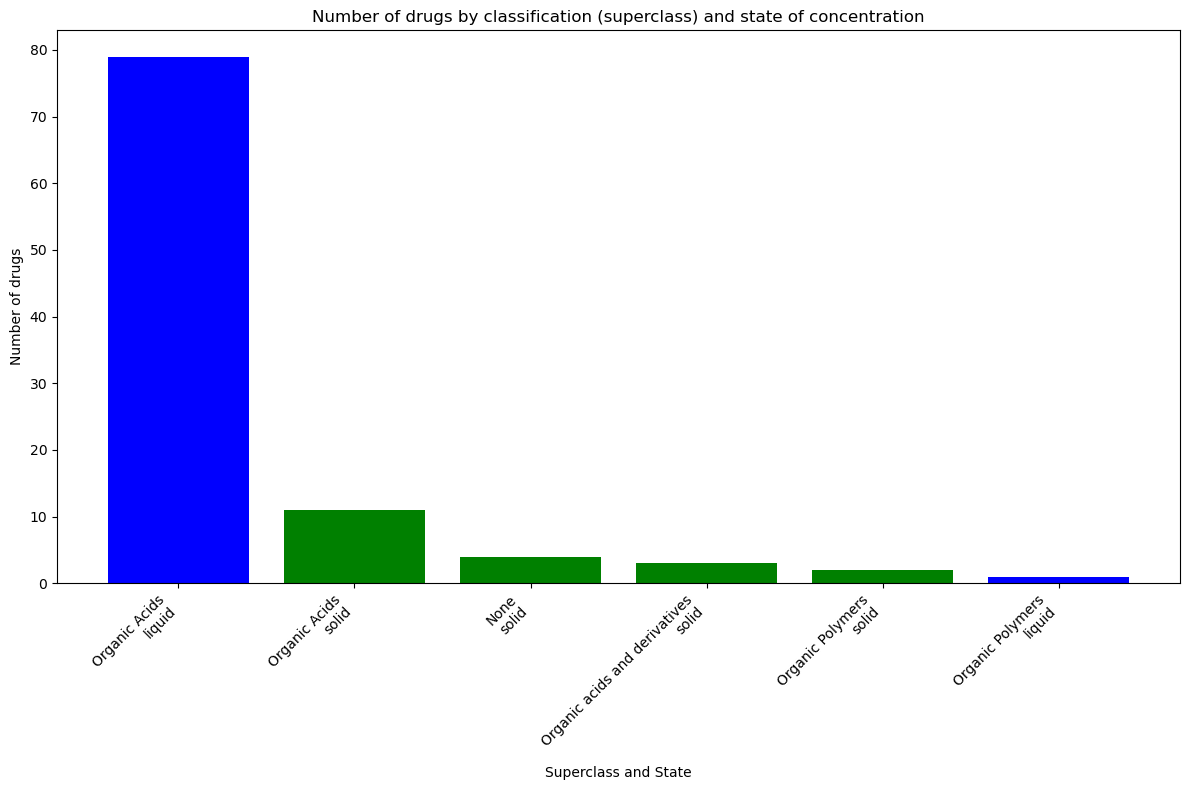

In [35]:

data_superclass_state = {}

for drug in root.findall('db:drug', ns):
    
    superclass_elem = drug.find('db:classification/db:superclass', ns)
    superclass = superclass_elem.text if superclass_elem is not None else 'None'
    
    # We download information about the state of concentration (if the element does not exist, we assign 'none')
    state_elem = drug.find('db:state', ns)
    state = state_elem.text if state_elem is not None else 'None'
    
    # We are building a key as a short (kingdom, state)
    key = (superclass, state)
    
    # We add the key to the dictionary if it doesn't
    if key not in data_superclass_state:
        data_superclass_state[key] = []
    data_superclass_state[key].append(drug.find('db:drugbank-id[@primary="true"]', ns).text)

# We are preparing data to create a data frame
rows = []
for (superclass, state), drugs in data_superclass_state.items():
    rows.append({'superclass': superclass, 'state': state, 'count': len(drugs) ,'drugs': drugs})


df_superclass_state = pd.DataFrame(sorted(rows, key=lambda x: x['count'], reverse=True))
display(df_superclass_state)

df_superclass_state['label'] = df_superclass_state.apply(lambda row: f"{row['superclass']}\n{row['state']}", axis=1)

colors_map = {
    'solid': 'green',
    'liquid': 'blue',
    'None': 'gray'
}
bar_colors = df_superclass_state['state'].map(lambda s: colors_map.get(s, 'black'))

plt.figure(figsize=(12, 8))
plt.bar(df_superclass_state['label'], df_superclass_state['count'], color=bar_colors)
plt.xlabel('Superclass and State')
plt.ylabel('Number of drugs')
plt.title('Number of drugs by classification (superclass) and state of concentration')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()